In [6]:
import tensorflow as tf
import os

In [7]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
  tf.config.experimental.set_memory_growth(gpu, True)

In [8]:
import cv2
import imghdr
from matplotlib import pyplot as plt

In [12]:
data_dir = 'data'

In [13]:
image_exts = ['jpeg', 'jpg', 'bmp', 'png']

In [15]:
for image_class in os.listdir(data_dir):
  for image in os.listdir(os.path.join(data_dir, image_class)):
    image_path = os.path.join(data_dir, image_class, image)
    try:
      img = cv2.imread(image_path)
      tip = imghdr.what(image_path)
      if tip not in image_exts:
        print ('Image not in ext list {}'.format(image_path))
        os.remove(image_path)
    except Exception as e:
      print ('Issue with image {}'.format(image_path))

Image not in ext list Project/data/happy/smiling-young-african-american-woman-260nw-2290057229.jpg
Image not in ext list Project/data/happy/vector3.svg
Image not in ext list Project/data/happy/vector12.svg
Image not in ext list Project/data/happy/vector11.svg
Image not in ext list Project/data/happy/vector10.svg
Image not in ext list Project/data/happy/vector9.svg
Image not in ext list Project/data/happy/traitshappypeople.jpg
Image not in ext list Project/data/happy/vector2.svg
Image not in ext list Project/data/happy/vector.svg
Image not in ext list Project/data/happy/1280px-Happy_People.jpg
Image not in ext list Project/data/happy/vector6.svg
Image not in ext list Project/data/happy/Happy20People.jpg
Image not in ext list Project/data/happy/vector7.svg
Image not in ext list Project/data/happy/vector4.svg
Image not in ext list Project/data/happy/vector5.svg
Image not in ext list Project/data/happy/vector8.svg
Image not in ext list Project/data/sad/depositphotos_210655610-stock-photo-s

In [16]:
tf.data.Dataset

tensorflow.python.data.ops.dataset_ops.DatasetV2

In [17]:
import numpy as np
from matplotlib import pyplot as plt

In [38]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 288 files belonging to 2 classes.


In [39]:
data_iterator = data.as_numpy_iterator()

In [40]:
batch = data_iterator.next()

In [41]:

batch[1].max()

1

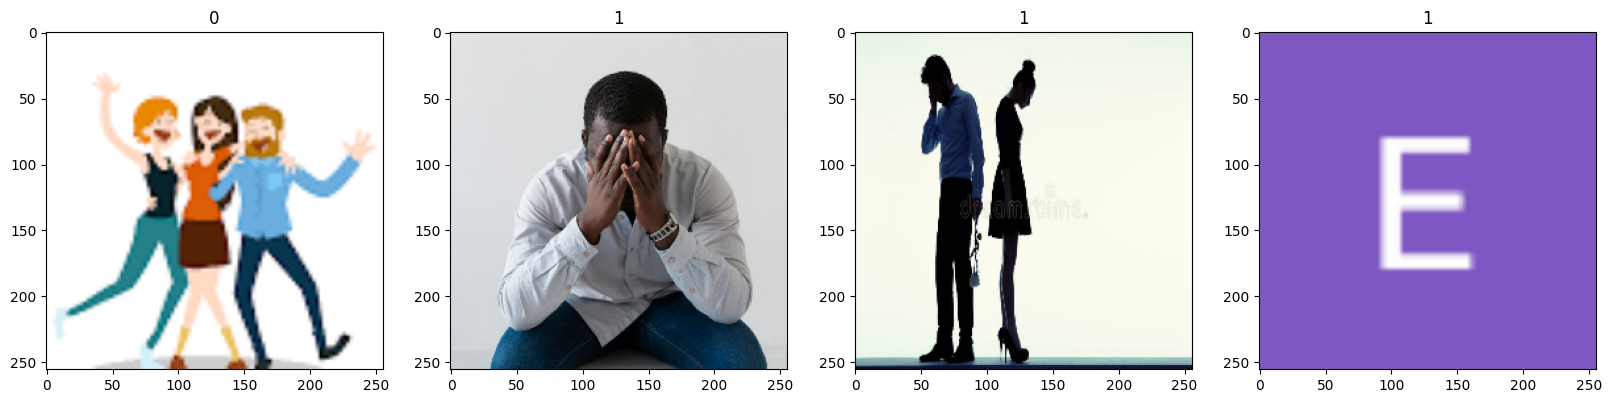

In [42]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
  ax[idx].imshow(img.astype(int))
  ax[idx].title.set_text(batch[1][idx])

In [43]:
data = data.map(lambda x, y: (x/255, y))

In [44]:
scaled_iterator = data.as_numpy_iterator()

In [45]:
batch = scaled_iterator.next()

In [46]:
batch[0].max()

1.0

In [47]:
len(data)

9

In [49]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)+1
test_size = int(len(data)*.1)+1

In [50]:
train_size+val_size+test_size

9

In [52]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size + val_size).take(test_size)

In [53]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [54]:
model = Sequential()

In [56]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


In [57]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [58]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 16)      2320      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 32)        4640      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 32)        0

In [59]:
logdir = 'logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir = logdir)
hist = model.fit(train, epochs=20, validation_data=val, callbacks = [tensorboard_callback])

Epoch 1/20
6/6 [==============================] - 19s 2s/step - loss: 1.6690 - accuracy: 0.5365 - val_loss: 0.9927 - val_accuracy: 0.5781
Epoch 2/20
6/6 [==============================] - 17s 3s/step - loss: 0.9292 - accuracy: 0.4635 - val_loss: 0.7550 - val_accuracy: 0.4688
Epoch 3/20
6/6 [==============================] - 16s 2s/step - loss: 0.6702 - accuracy: 0.5938 - val_loss: 0.4886 - val_accuracy: 0.8281
Epoch 4/20
6/6 [==============================] - 19s 3s/step - loss: 0.5919 - accuracy: 0.6875 - val_loss: 0.5348 - val_accuracy: 0.8125
Epoch 5/20
6/6 [==============================] - 16s 2s/step - loss: 0.5273 - accuracy: 0.8021 - val_loss: 0.4182 - val_accuracy: 0.8281
Epoch 6/20
6/6 [==============================] - 16s 2s/step - loss: 0.4048 - accuracy: 0.8385 - val_loss: 0.3445 - val_accuracy: 0.8438
Epoch 7/20
6/6 [==============================] - 15s 2s/step - loss: 0.3659 - accuracy: 0.8229 - val_loss: 0.2911 - val_accuracy: 0.8438
Epoch 8/20
6/6 [==================

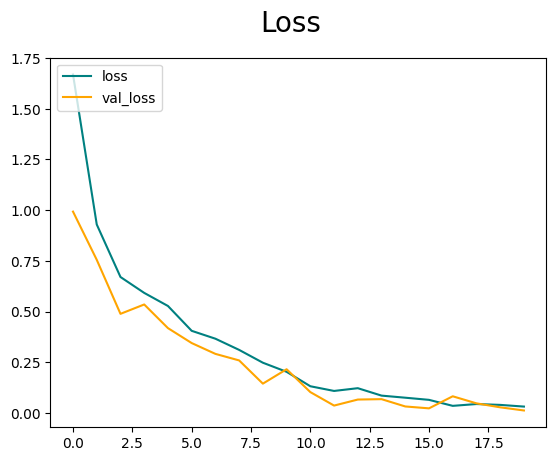

In [61]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss' )
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

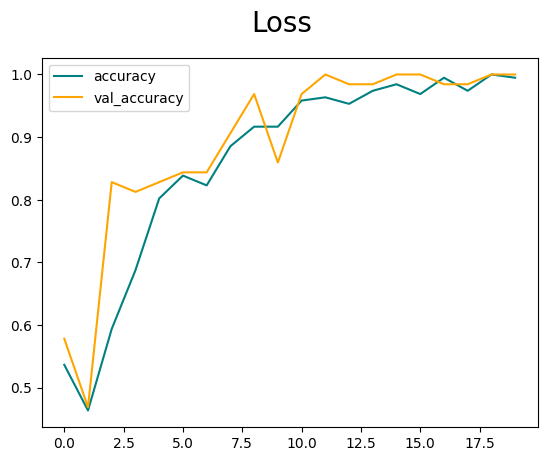

In [63]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy' )
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [64]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy


In [67]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [68]:
for batch in test.as_numpy_iterator():
  X, y = batch
  yhat = model.predict(X)
  pre.update_state(y, yhat)
  re.update_state(y,yhat)
  acc.update_state(y, yhat)


1/1 [==============================] - 0s 461ms/step


In [69]:
print(f'Precision:{pre.result().numpy()}, Recall: {re.result().numpy()}, Accuracy:{acc.result().numpy()}')

Precision:1.0, Recall: 1.0, Accuracy:1.0


In [ ]:
img = cv2.imread

In [72]:
from tensorflow.keras.models import load_model
model.save(os.path.join('models', 'happysadmodel.h5'))
new_model = load_model(os.path.ecjoin('models', 'happysadmodel.h5'))
